# Life Expectancy and GDP data visualization project

## Scope

The dataset provided _all_data.csv_ has the following columns of data:
* Country - nation, for six countries (Chile, China, Germany, Mexico, USA, Zimbabwe)
* Year - the year for the observation
* Life expectancy at birth (years) - life expectancy value in years
* GDP - Gross Domestic Product in U.S. dollars

I will aim to visualize the following statistics:
* Life expectancy per country per year
* GDP per country per year  
These two plots will be displayed alongside each other.
* Life expectancy vs GDP + per year, for each of the six countries  
These will be painted as six graphs, one for each country


## Preliminaries

In [3]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Read the dataset into a dataframe
df_all = pd.read_csv('all_data.csv') 
# Examine a few data rows
print(df_all.head())
# Rename some columns
df_all = df_all.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'})
print(df_all.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## Life expectancy and GDP per year per country

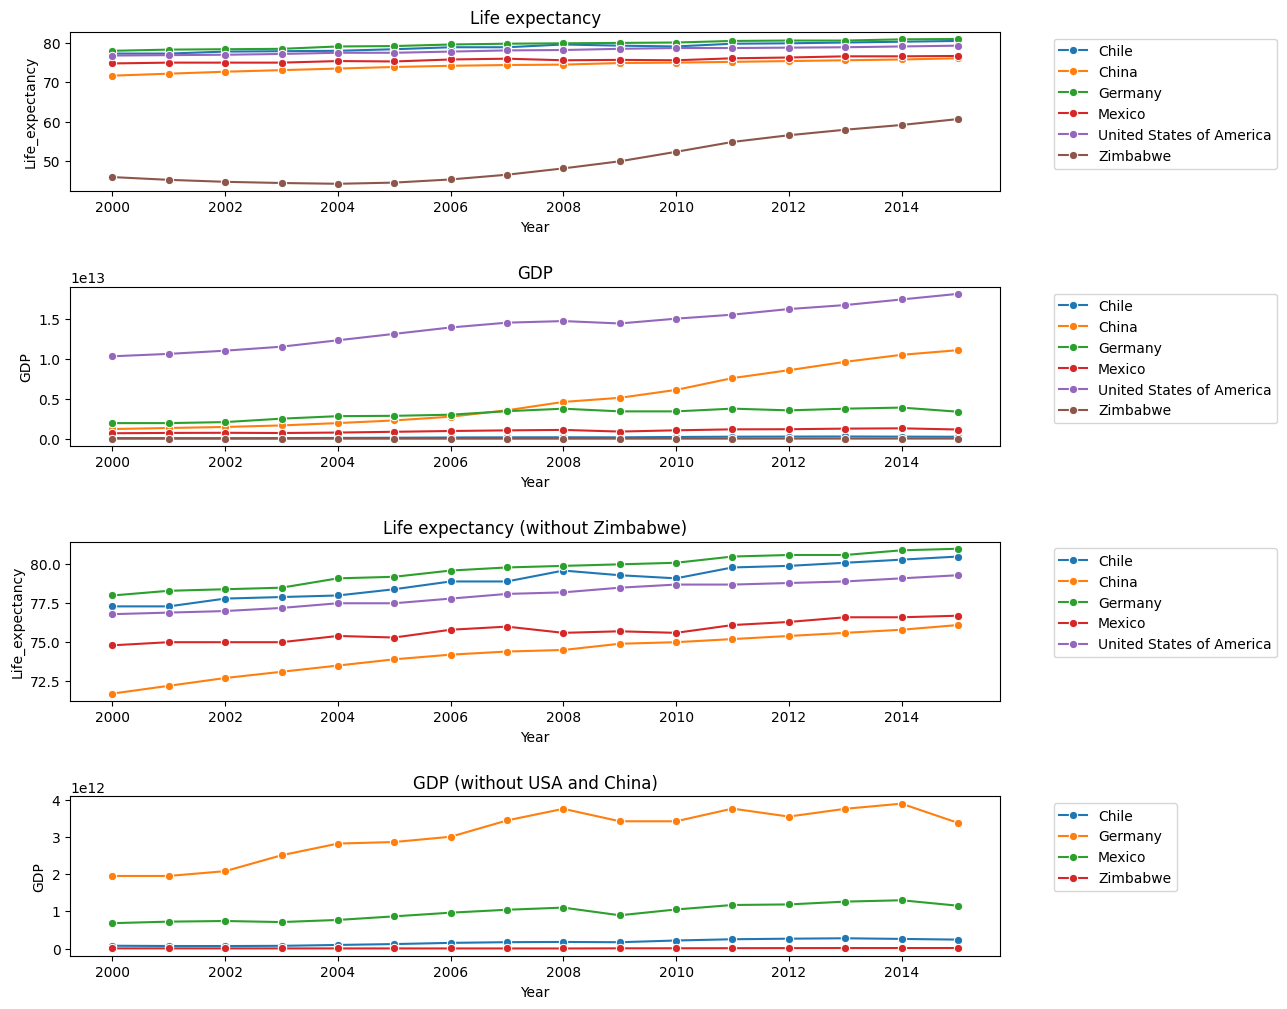

In [5]:
plt.figure(figsize=(12, 12))
plt.subplot(4,1,1)
sns.lineplot(data=df_all, x='Year', y='Life_expectancy', marker='o', hue='Country')
plt.title('Life expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
plt.subplot(4,1,2)
sns.lineplot(data=df_all, x='Year', y='GDP', marker='o', hue='Country')
plt.title('GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
plt.subplot(4,1,3)
df_noZim = df_all[df_all['Country'] != 'Zimbabwe']
sns.lineplot(data=df_noZim, x='Year', y='Life_expectancy', marker='o', hue='Country')
plt.title('Life expectancy (without Zimbabwe)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
plt.subplot(4,1,4)
df_noUsa = df_all[~df_all['Country'].isin(['United States of America', 'China']) ]
sns.lineplot(data=df_noUsa, x='Year', y='GDP', marker='o', hue='Country')
plt.title('GDP (without USA and China)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
plt.subplots_adjust(hspace=0.6)
plt.show()

## Life Expectancy vis-a-vis GDP per country

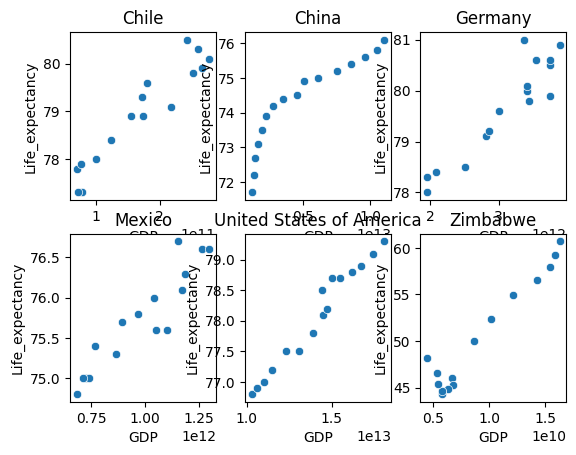

In [6]:
# Get a list of all the countries
countries = df_all['Country'].value_counts().index
# Loop over all the countries and draw a graph for each country
for i in range(len(countries)):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df_all[df_all.Country == countries[i]], x='GDP', y='Life_expectancy')
    plt.title(countries[i])
plt.show()